In [18]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

In [19]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

m = y.size

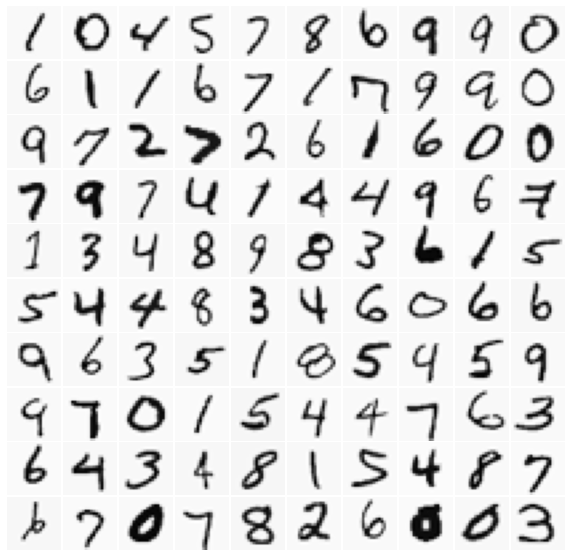

In [20]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

In [21]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

In [22]:
def sigmoid(z):
    def sig(x):
         return 1/(1 + np.exp(-x))
    z = np.array(z)
    
    
    vfunc = np.vectorize(sig) 
    
    g = vfunc(z)
    
    return g 

In [23]:
def lrCostFunction(theta, X, y, lambda_):
    #Initialize some useful values
    m = y.size
    
    # convert labels to ints if their type is bool
    if y.dtype == bool:
        y = y.astype(int)
    
    h = sigmoid(X @ theta)
    
    log = np.vectorize(np.log)
    
    J = (-(y.T)@log(h) -((1-y).T)@log(1-h))/m 
    
    last_sum = (np.dot(theta[1:], theta[1:]))
    last_therm = ((last_sum*(lambda_))/(2*m))
    J += last_therm
    
    #grad = ((X.T)@(h - y))/m
    grad = np.zeros(X.shape[1])
    grad[0] = ((X[:,0].T)@(h - y))/m 
    grad[1:]= (((X[:,1:].T)@(h - y))/m) + ((lambda_)/m)*theta[1:]
    return J, grad
    

In [24]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [27]:
def oneVsAll(X, y, num_labels, lambda_):
    # Some useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly 
    all_theta = np.zeros((num_labels, n + 1))

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for label in range(num_labels): 
        current_y = y.copy()
        current_y[y == label] = 1 
        current_y[y != label] = 0 
        
        initial_theta = np.zeros(n+1)
        options= {'maxiter': 50}

        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, current_y, lambda_),
                                jac=True,
                                method='TNC',
                                options=options)
        
        all_theta[label, :] = res.x
        
    return all_theta

In [28]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

In [30]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    hypo_matrix = X @ all_theta.T
    all_p = sigmoid(hypo_matrix)
    p = np.argmax(all_p , axis=1)
    
    return p